In [5]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
from tensorflow.keras.models import load_model


2025-06-11 13:42:31.046641: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-11 13:42:31.052925: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-11 13:42:31.101988: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-11 13:42:31.149357: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749660151.192955    4480 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749660151.20

## LCNN

In [6]:
model_lcnn = keras.models.load_model("models/lcnn_v2.keras")


E0000 00:00:1749660156.739226    4480 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1749660156.740408    4480 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
model_lcnn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,354 (1.97 MB)

 Trainable params: 171,784 (671.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 343,570 (1.31 MB)

In [8]:
datagen_lcnn = tf.keras.preprocessing.image.ImageDataGenerator()


In [9]:
CLEAN_VALIDATION_DATASET_PATH = "MangoLeaf"
clean_validation_dataset_generator_lcnn = datagen_lcnn.flow_from_directory(
    CLEAN_VALIDATION_DATASET_PATH,
    target_size=(224, 224),
    batch_size=128,
    shuffle=False
)

Found 4000 images belonging to 8 classes.


In [11]:
preds = model_lcnn.predict(clean_validation_dataset_generator_lcnn)
predicted_classes = np.argmax(preds, axis=1)

accuracy = accuracy_score(clean_validation_dataset_generator_lcnn.labels, predicted_classes)

/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 480ms/step


### Image Data Loading

In [12]:
images = keras.utils.image_dataset_from_directory(CLEAN_VALIDATION_DATASET_PATH, batch_size=128, image_size=(224, 224), shuffle=False, crop_to_aspect_ratio=True, interpolation='bicubic')

Found 4000 files belonging to 8 classes.


In [13]:
true_class_names = tf.concat([label for _, label in images], axis = 0)

2025-06-11 13:44:16.548784: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [14]:
preds = model_lcnn.predict(images)

predicted_classes = np.argmax(preds, axis=1)
accuracy = accuracy_score(true_class_names, predicted_classes)

32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step


In [15]:
accuracy

0.97025

In [16]:
import os
import shutil
from pathlib import Path

# Define corruption mappings according to the provided categories
CORRUPTION_TYPES = {
    'blur': ['defocus_blur', 'gaussian_blur', 'glass_blur', 'motion_blur', 'zoom_blur'],
    'digital': ['contrast', 'elastic_transform', 'jpeg_compression', 'pixelate', 'saturate'],
    'noise': ['gaussian_noise', 'impulse_noise', 'shot_noise', 'speckle_noise'],
    'weather': ['brightness', 'fog', 'frost', 'snow', 'spatter']
}

# Create a mapping from original directory names to new structure
name_mapping = {
    'Defocus Blur': {'category': 'blur', 'specific': 'defocus_blur'},
    'Gaussian Blur': {'category': 'blur', 'specific': 'gaussian_blur'},
    'Glass Blur': {'category': 'blur', 'specific': 'glass_blur'},
    'Motion Blur': {'category': 'blur', 'specific': 'motion_blur'},
    'Zoom Blur': {'category': 'blur', 'specific': 'zoom_blur'},
    
    'Contrast': {'category': 'digital', 'specific': 'contrast'},
    'Elastic': {'category': 'digital', 'specific': 'elastic_transform'},
    'JPEG': {'category': 'digital', 'specific': 'jpeg_compression'},
    'Pixelate': {'category': 'digital', 'specific': 'pixelate'},
    'Saturate': {'category': 'digital', 'specific': 'saturate'},
    
    'Gaussian Noise': {'category': 'noise', 'specific': 'gaussian_noise'},
    'Impulse Noise': {'category': 'noise', 'specific': 'impulse_noise'},
    'Shot Noise': {'category': 'noise', 'specific': 'shot_noise'},
    'Speckle Noise': {'category': 'noise', 'specific': 'speckle_noise'},
    
    'Brightness': {'category': 'weather', 'specific': 'brightness'},
    'Fog': {'category': 'weather', 'specific': 'fog'},
    'Frost': {'category': 'weather', 'specific': 'frost'},
    'Snow': {'category': 'weather', 'specific': 'snow'},
    'Spatter': {'category': 'weather', 'specific': 'spatter'}
}

# Path to source and destination directories
src_base = "bancos/bancos"
dst_base = "bancos_mce"

# Create destination base directory if it doesn't exist
os.makedirs(dst_base, exist_ok=True)

# Process all corruptions and severities
for item in os.listdir(src_base):
    # Check if this is a corruption_severity directory
    if "_severity_" in item:
        parts = item.split("_severity_")
        corruption_type = parts[0]
        severity = parts[1]
        
        # Skip if corruption type not in our mapping
        if corruption_type not in name_mapping:
            print(f"Warning: Unknown corruption type '{corruption_type}', skipping")
            continue
        
        # Get category and specific corruption
        category = name_mapping[corruption_type]["category"]
        specific = name_mapping[corruption_type]["specific"]
        
        # Process all classes
        src_corruption_dir = os.path.join(src_base, item)
        for class_name in os.listdir(src_corruption_dir):
            # Create destination directory
            dst_dir = os.path.join(dst_base, category, specific, severity, class_name)
            os.makedirs(dst_dir, exist_ok=True)
            
            # Copy all images
            src_class_dir = os.path.join(src_corruption_dir, class_name)
            for img in os.listdir(src_class_dir):
                if img.lower().endswith(('.jpg', '.jpeg', '.png')):
                    src_path = os.path.join(src_class_dir, img)
                    dst_path = os.path.join(dst_dir, img)
                    shutil.copy2(src_path, dst_path)
            
            print(f"Copied {corruption_type} severity {severity}, class {class_name} to {dst_dir}")

print("Reorganization complete!")

Copied Zoom Blur severity 1, class Powdery Mildew to bancos_mce/blur/zoom_blur/1/Powdery Mildew
Copied Zoom Blur severity 1, class Cutting Weevil to bancos_mce/blur/zoom_blur/1/Cutting Weevil
Copied Zoom Blur severity 1, class Bacterial Canker to bancos_mce/blur/zoom_blur/1/Bacterial Canker
Copied Zoom Blur severity 1, class Healthy to bancos_mce/blur/zoom_blur/1/Healthy
Copied Zoom Blur severity 1, class Gall Midge to bancos_mce/blur/zoom_blur/1/Gall Midge
Copied Zoom Blur severity 1, class Anthracnose to bancos_mce/blur/zoom_blur/1/Anthracnose
Copied Zoom Blur severity 1, class Die Back to bancos_mce/blur/zoom_blur/1/Die Back
Copied Zoom Blur severity 1, class Sooty Mould to bancos_mce/blur/zoom_blur/1/Sooty Mould
Copied Contrast severity 4, class Powdery Mildew to bancos_mce/digital/contrast/4/Powdery Mildew
Copied Contrast severity 4, class Cutting Weevil to bancos_mce/digital/contrast/4/Cutting Weevil
Copied Contrast severity 4, class Bacterial Canker to bancos_mce/digital/contras

### Evaluate Corruption Error

In [17]:
CORRUPTION_TYPES = {
    'blur': ['defocus_blur', 'gaussian_blur', 'glass_blur', 'motion_blur', 'zoom_blur'],
    'digital': ['contrast', 'elastic_transform', 'jpeg_compression', 'pixelate', 'saturate'],
    'noise': ['gaussian_noise', 'impulse_noise', 'shot_noise', 'speckle_noise'],
    'weather': ['brightness', 'fog', 'frost', 'snow', 'spatter']
}

# BASE_PATH = 'C:/Users/DESKTOP/pesquisaGabriel/estruturaParaMceERelative'
BASE_PATH = "bancos_mce"


In [18]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [19]:
blur_generator_one = datagen.flow_from_directory(
    f'{BASE_PATH}/blur/{CORRUPTION_TYPES["blur"][0]}/1',
    target_size=(224, 224),
    batch_size=64,
    shuffle=False
)

Found 4000 images belonging to 8 classes.


In [20]:
preds = model_lcnn.predict(blur_generator_one)

/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step


In [21]:
predicted_classes = np.argmax(preds, axis=1)

In [22]:
accuracy_lcnn = accuracy_score(blur_generator_one.labels, predicted_classes)

## Generate Corruption Error for all type of corruptions in LCNN

In [23]:
import json

def load_json(filename):
    with open(filename, 'r') as f:
        return json.load(f)

def save_json(filename, data):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

In [24]:
result = {
    'blur': {},
    'digital': {},
    'noise': {},
    'weather': {}
}
for subject in CORRUPTION_TYPES.keys():
    for corruption_type in range(len(CORRUPTION_TYPES[subject])):
        for severity in range(1, 6):
            corruption_name = CORRUPTION_TYPES[subject][corruption_type]

            generator = datagen.flow_from_directory(
                f'{BASE_PATH}/{subject}/{corruption_name}/{severity}',
                target_size=(224, 224),
                batch_size=64,
                shuffle=False
            )

            preds = model_lcnn.predict(generator)
            predicted_classes = np.argmax(preds, axis=1)

            accuracy = accuracy_score(generator.labels, predicted_classes)

            if corruption_name not in result[subject]:
                result[subject][corruption_name] = {}

            result[subject][corruption_name][severity] = 1 - accuracy

            save_json('results/mce/corruption_lcnn_error.json', result)


Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 251ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 247ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 243ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 280ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 258ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 266ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 260ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 260ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 260ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 254ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 268ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 271ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 280ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 266ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 271ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 270ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 274ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 276ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 283ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 275ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 275ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 277ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 275ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 268ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 279ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 296ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 292ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 274ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 268ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 257ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 262ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 258ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 278ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 243ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 233ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 252ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 275ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 271ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 268ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 266ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 257ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 262ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 258ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 250ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 247ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 252ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 252ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 247ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 244ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 285ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 298ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 292ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 278ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step


## MobileNetV3

In [25]:
model_mobilenetv3 = keras.models.load_model("models/mobilenetv3_model.keras")


In [26]:
model_mobilenetv3.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,616 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 952,970 (3.64 MB)

 Trainable params: 4,616 (18.03 KB)

 Non-trainable params: 939,120 (3.58 MB)

 Optimizer params: 9,234 (36.07 KB)

In [27]:
datagen_mobilenetv3 = tf.keras.preprocessing.image.ImageDataGenerator()

In [28]:
CLEAN_VALIDATION_DATASET_PATH = "MangoLeaf"
clean_validation_dataset_generator_mobilenetv3 = datagen_mobilenetv3.flow_from_directory(
    CLEAN_VALIDATION_DATASET_PATH,
    target_size=(224, 224),
    batch_size=128,
    shuffle=False
)
preds = model_mobilenetv3.predict(clean_validation_dataset_generator_mobilenetv3)
predicted_classes = np.argmax(preds, axis=1)

accuracy_mobilenetv3 = accuracy_score(clean_validation_dataset_generator_mobilenetv3.labels, predicted_classes)



Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 683ms/step


In [29]:
accuracy

0.39775

In [30]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [31]:
result = {
    'blur': {},
    'digital': {},
    'noise': {},
    'weather': {}
}
for subject in CORRUPTION_TYPES.keys():
    for corruption_type in range(len(CORRUPTION_TYPES[subject])):
        for severity in range(1, 6):
            corruption_name = CORRUPTION_TYPES[subject][corruption_type]

            generator = datagen.flow_from_directory(
                f'{BASE_PATH}/{subject}/{corruption_name}/{severity}',
                target_size=(224, 224),
                batch_size=64,
                shuffle=False
            )

            preds = model_mobilenetv3.predict(generator)
            predicted_classes = np.argmax(preds, axis=1)

            accuracy = accuracy_score(generator.labels, predicted_classes)

            if corruption_name not in result[subject]:
                result[subject][corruption_name] = {}

            result[subject][corruption_name][severity] = 1 - accuracy

            save_json('results/mce/corruption_mobilenetv3_error.json', result)


Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 332ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 292ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 280ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 294ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 313ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 326ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 344ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 306ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 353ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 307ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 297ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 258ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 260ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 345ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 347ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 286ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 262ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 291ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 313ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 323ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 340ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 285ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 261ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 260ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 254ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 252ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 252ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 279ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 285ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 270ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 258ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 270ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 266ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 289ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 244ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 261ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 233ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 244ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 223ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 251ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 279ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 280ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 250ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 274ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 458ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 494ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 360ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 284ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 275ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 271ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 372ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 359ms/step


## EfficientNet


In [32]:
model_efficientnet = keras.models.load_model("models/efficientNetB0.keras")

model_efficientnet.summary()

datagen_efficientnet = tf.keras.preprocessing.image.ImageDataGenerator()




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │        10,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,080,317 (15.57 MB)

 Trainable params: 10,248 (40.03 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 20,498 (80.07 KB)

In [33]:
CLEAN_VALIDATION_DATASET_PATH = "MangoLeaf"
clean_validation_dataset_generator_efficientNet = datagen_efficientnet.flow_from_directory(
    CLEAN_VALIDATION_DATASET_PATH,
    target_size=(224, 224),
    batch_size=128,
    shuffle=False
)

Found 4000 images belonging to 8 classes.


In [34]:
preds = model_efficientnet.predict(clean_validation_dataset_generator_efficientNet)
predicted_classes = np.argmax(preds, axis=1)

accuracy_efficientnet = accuracy_score(clean_validation_dataset_generator_efficientNet.labels, predicted_classes)
accuracy_efficientnet


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step


0.99975

### Generate Corruption Error for all type of corruptions in EfficientNet

In [35]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [36]:
result = {
    'blur': {},
    'digital': {},
    'noise': {},
    'weather': {}
}
for subject in CORRUPTION_TYPES.keys():
    for corruption_type in range(len(CORRUPTION_TYPES[subject])):
        for severity in range(1, 6):
            corruption_name = CORRUPTION_TYPES[subject][corruption_type]

            generator = datagen.flow_from_directory(
                f'{BASE_PATH}/{subject}/{corruption_name}/{severity}',
                target_size=(224, 224),
                batch_size=64,
                shuffle=False
            )

            preds = model_efficientnet.predict(generator)
            predicted_classes = np.argmax(preds, axis=1)

            accuracy = accuracy_score(generator.labels, predicted_classes)

            if corruption_name not in result[subject]:
                result[subject][corruption_name] = {}

            result[subject][corruption_name][severity] = 1 - accuracy

            save_json('results/mce/corruption_efficientNet_error.json', result)

Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 888ms/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step
Found 4000 images belonging to 8 classes.


/home/saulolv/PIBIC/TinyML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step


In [39]:
# Save ACCURACY RESULTS in JSON format
accuracy_results = {
    "lcnn_accuracy": accuracy,
    "mobilenetv3_accuracy": accuracy_mobilenetv3,
    "efficientnet_accuracy": accuracy_efficientnet
}
save_json('results/mce/accuracy_results.json', accuracy_results)

# Evaluate Corruption Error

In [40]:
# Evaluate Corruption Error

corruption_error_lcnn = load_json('results/mce/corruption_lcnn_error.json')
corruption_error_mobilenetv3 = load_json('results/mce/corruption_mobilenetv3_error.json')
corruption_error_efficientnet = load_json('results/mce/corruption_efficientNet_error.json')

In [41]:
def sum_levels(category_data):
    return {key: sum(levels.values()) for key, levels in category_data.items()}

def sum_corruption_error_by_corruption(corruption_error_data):
    return {category: sum_levels(corruption_error_data[category]) for category in corruption_error_data}

In [42]:
sum_corruption_error_lcnn = sum_corruption_error_by_corruption(corruption_error_lcnn)
sum_corruption_error_mobilenetv3 = sum_corruption_error_by_corruption(corruption_error_mobilenetv3)
sum_corruption_error_efficientnet = sum_corruption_error_by_corruption(corruption_error_efficientnet)

In [43]:
sum_corruption_error_lcnn

{'blur': {'defocus_blur': 0.15125,
  'gaussian_blur': 0.16975000000000007,
  'glass_blur': 0.1352500000000001,
  'motion_blur': 0.22925000000000006,
  'zoom_blur': 0.9082500000000001},
 'digital': {'contrast': 3.113,
  'elastic_transform': 0.15500000000000003,
  'jpeg_compression': 0.16125,
  'pixelate': 0.9195000000000001,
  'saturate': 1.95825},
 'noise': {'gaussian_noise': 1.508,
  'impulse_noise': 2.21725,
  'shot_noise': 0.8945000000000001,
  'speckle_noise': 0.74925},
 'weather': {'brightness': 0.49050000000000005,
  'fog': 1.77125,
  'frost': 1.5162499999999999,
  'snow': 1.70925,
  'spatter': 1.58625}}

In [44]:
def sum_levels_relative(category_data, baseline_clean_error):
    result = {}
    for key, levels in category_data.items():
        total_sum = 0.
        for corruption_value in levels.values():
            total_sum += corruption_value - baseline_clean_error
        result[key] = total_sum
    return result
def sum_relative_corruption_error(corruption_error_data, baseline_clean_error):
    return {category: sum_levels_relative(corruption_error_data[category], baseline_clean_error) for category in corruption_error_data}

In [45]:
CLEAN_ERROR_LCNN = 1 - accuracy_lcnn
CLEAN_ERROR_MOBILENETV3 = 1 - accuracy_mobilenetv3
CLEAN_ERROR_EFFICIENTNET = 1 - accuracy_efficientnet

sum_relative_corruption_error_lcnn = sum_relative_corruption_error(corruption_error_lcnn, CLEAN_ERROR_LCNN)
sum_relative_corruption_error_mobilenetv3 = sum_relative_corruption_error(corruption_error_mobilenetv3, CLEAN_ERROR_MOBILENETV3)
sum_relative_corruption_error_efficientnet = sum_relative_corruption_error(corruption_error_efficientnet, CLEAN_ERROR_EFFICIENTNET)


In [46]:
def generate_relative_and_corruption_error(sum_ce_model, sum_rel_ce_model, sum_ce_baseline, sum_rel_ce_baseline, nameNet, CLEAN_ERROR):

    CORRUPTION_TYPES = {
        'blur': ['defocus_blur', 'gaussian_blur', 'glass_blur', 'motion_blur', 'zoom_blur'],
        'digital': ['contrast', 'elastic_transform', 'jpeg_compression', 'pixelate', 'saturate'],
        'noise': ['gaussian_noise', 'impulse_noise', 'shot_noise', 'speckle_noise'],
        'weather': ['brightness', 'fog', 'frost', 'snow', 'spatter']
    }
    
    ce_result = {}
    relative_ce_result = {}
    for key, corruptions in CORRUPTION_TYPES.items():
        for corruption in corruptions:
            corruption_error = sum_ce_model[key][corruption] / sum_ce_baseline[key][corruption]
            relative_corruption_error = sum_rel_ce_model[key][corruption] /  sum_rel_ce_baseline[key][corruption]
            ce_result[corruption] = round(corruption_error * 100)
            relative_ce_result[corruption] = round(relative_corruption_error * 100)

    ce_result['mCE'] = round(sum(ce_result.values()) / 19, 1)
    ce_result['Network'] = nameNet
    ce_result['Error'] = CLEAN_ERROR
    relative_ce_result['Rel. mCE'] = round(sum(relative_ce_result.values()) / 19, 1)
    relative_ce_result['Network'] = nameNet
    relative_ce_result['Error'] = CLEAN_ERROR
    return ce_result, relative_ce_result

In [47]:
ce_result_lcnn, relative_ce_result_lcnn = generate_relative_and_corruption_error(
    sum_corruption_error_lcnn,
    sum_relative_corruption_error_lcnn,
    sum_corruption_error_lcnn,
    sum_relative_corruption_error_lcnn,
    "LCNN",
    CLEAN_ERROR_LCNN
)

ce_result_mobilenetv3, relative_ce_result_mobilenetv3 = generate_relative_and_corruption_error(
    sum_corruption_error_mobilenetv3,
    sum_relative_corruption_error_mobilenetv3,
    sum_corruption_error_lcnn,
    sum_relative_corruption_error_lcnn,
    "MobileNetV3",
    CLEAN_ERROR_MOBILENETV3
)

ce_result_efficientnet, relative_ce_result_efficientnet = generate_relative_and_corruption_error(
    sum_corruption_error_efficientnet,
    sum_relative_corruption_error_efficientnet,
    sum_corruption_error_lcnn,
    sum_relative_corruption_error_lcnn,
    "EfficientNet",
    CLEAN_ERROR_EFFICIENTNET
)

In [48]:
ce_result_lcnn

ce_result_mobilenetv3

ce_result_efficientnet


{'defocus_blur': 6,
 'gaussian_blur': 6,
 'glass_blur': 5,
 'motion_blur': 7,
 'zoom_blur': 35,
 'contrast': 15,
 'elastic_transform': 13,
 'jpeg_compression': 8,
 'pixelate': 369,
 'saturate': 3,
 'gaussian_noise': 33,
 'impulse_noise': 40,
 'shot_noise': 40,
 'speckle_noise': 46,
 'brightness': 8,
 'fog': 14,
 'frost': 25,
 'snow': 52,
 'spatter': 41,
 'mCE': 40.3,
 'Network': 'EfficientNet',
 'Error': 0.00024999999999997247}

# mCE

In [58]:
import pandas as pd

# Criando o DataFrame inicial
df_mce = pd.DataFrame([ce_result_lcnn])
df_mce = pd.concat([df_mce, pd.DataFrame([ce_result_mobilenetv3, ce_result_efficientnet])], ignore_index=True)

# Melhorando a visualização do DataFrame
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
pd.set_option('display.width', 1000)       # Ajusta a largura da exibição
pd.set_option('display.precision', 2)      # Define a precisão decimal

In [59]:
# Definindo a nova ordem das colunas
nova_ordem_colunas = [
    'Network', 'Error', 'mCE', 'gaussian_noise', 'shot_noise', 'impulse_noise', 'speckle_noise', 'defocus_blur', 'glass_blur', 'motion_blur',
    'zoom_blur','gaussian_blur', 'snow', 'frost', 'fog', 'brightness', 'spatter', 'contrast', 'elastic_transform', 'jpeg_compression','pixelate', 
    'saturate']

# Reordenando as colunas
df_mce = df_mce[nova_ordem_colunas]

In [60]:
df_mce


,Network,Error,mCE,gaussian_noise,shot_noise,impulse_noise,speckle_noise,defocus_blur,glass_blur,motion_blur,zoom_blur,gaussian_blur,snow,frost,fog,brightness,spatter,contrast,elastic_transform,jpeg_compression,pixelate,saturate
0,LCNN,2.70e-02,100.0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
1,MobileNetV3,2.25e-03,49.6,34,44,56,57,14,9,10,45,14,103,25,22,16,83,21,53,18,287,32
2,EfficientNet,2.50e-04,40.3,33,40,40,46,6,5,7,35,6,52,25,14,8,41,15,13,8,369,3


In [61]:
# Renomeando colunas específicas
df_mce = df_mce.rename(columns={'gaussian_noise': 'Gaussian Noise', 'shot_noise': 'Shot Noise', 'impulse_noise': 'Impulse Noise', 
                        'speckle_noise' : 'Speckle Noise', 'defocus_blur': 'Defocus Blur', 'glass_blur': 'Glass Blur',
                       'motion_blur': 'Motion Blur', 'zoom_blur': 'Zoom Blur', 'gaussian_blur': 'Gaussian Blur', 'snow': 'Snow',
                       'frost': 'Frost', 'fog': 'Fog', 'brightness': 'Brightness', 'spatter': 'Spatter', 'contrast': 'Contrast', 
                       'elastic_transform': 'Elastic', 'jpeg_compression': 'JPEG', 'pixelate': 'Pixelate', 'saturate': 'Saturate'})

In [62]:
# Multiplicando a coluna 'Pontuação' por 100
df_mce['Error'] = df_mce['Error'] * 100
df_mce = df_mce.rename(columns={'Error': 'Clean Error (%)'})


In [63]:
df_mce['Clean Error (%)'] = df_mce['Clean Error (%)'].round(2)


In [64]:
# Ordenando de forma decrescente pela coluna 'Error'
df_mce = df_mce.sort_values(by='Clean Error (%)', ascending=False)

In [66]:
df_mce


,Network,Clean Error (%),mCE,Gaussian Noise,Shot Noise,Impulse Noise,Speckle Noise,Defocus Blur,Glass Blur,Motion Blur,Zoom Blur,Gaussian Blur,Snow,Frost,Fog,Brightness,Spatter,Contrast,Elastic,JPEG,Pixelate,Saturate
0,LCNN,2.70,100.0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
1,MobileNetV3,0.22,49.6,34,44,56,57,14,9,10,45,14,103,25,22,16,83,21,53,18,287,32
2,EfficientNet,0.02,40.3,33,40,40,46,6,5,7,35,6,52,25,14,8,41,15,13,8,369,3


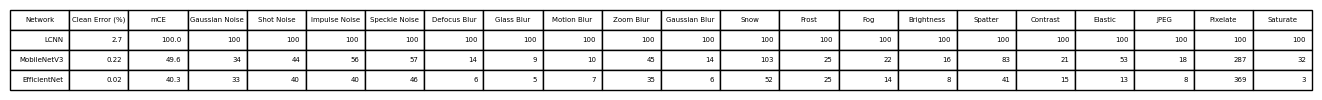

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Criar uma figura e um eixo
fig, ax = plt.subplots(figsize=(8, 0.2))  # Ajuste o tamanho conforme necessário

# Remover os eixos
ax.axis('off')

# Criar a tabela
table = ax.table(cellText=df_mce.values, colLabels=df_mce.columns, loc='center')

# Ajustar o layout
table.auto_set_font_size(False)
table.set_fontsize(5)
table.scale(2.1, 1.2)  # Ajuste a escala conforme necessário

# Salvar a imagem
plt.savefig('results/mce/tabela_mce.png', bbox_inches='tight', dpi=300)

# Mostrar a imagem (opcional)
plt.show()

In [68]:
# Salva para xlsx
df_mce.to_excel('results/mce/tabela_mce.xlsx', index=False)


In [69]:
# Make a copy to avoid modifying the original DataFrame used elsewhere
df_transpoed_mce = df_mce.copy()

# Set 'Network' as the index
df_transposed_for_excel = df_transpoed_mce.set_index('Network')

# Transpose the DataFrame
df_transposed_for_excel = df_transposed_for_excel.T

# --- Save to Excel ---
excel_filename = 'results/mce/tabela_mce_transposed.xlsx'
# Save with the index (corruption names/metrics) as the first column
df_transposed_for_excel.to_excel(excel_filename, index=True)

print(f"Transposed table saved to {excel_filename}")

Transposed table saved to results/mce/tabela_mce_transposed.xlsx


# Relative mCE

In [70]:
# Criando o DataFrame inicial
df_relative_mce = pd.DataFrame([relative_ce_result_lcnn])
df_relative_mce = pd.concat([df_relative_mce, pd.DataFrame([relative_ce_result_mobilenetv3, relative_ce_result_efficientnet])], ignore_index=True)


In [71]:
# Definindo a nova ordem das colunas
nova_ordem_colunas = [
    'Network', 'Error', 'Rel. mCE', 'gaussian_noise', 'shot_noise', 'impulse_noise', 'speckle_noise', 'defocus_blur', 'glass_blur', 'motion_blur',
    'zoom_blur','gaussian_blur', 'snow', 'frost', 'fog', 'brightness', 'spatter', 'contrast', 'elastic_transform', 'jpeg_compression','pixelate', 
    'saturate']

# Reordenando as colunas
df_relative_mce = df_relative_mce[nova_ordem_colunas]

In [72]:
df_relative_mce

,Network,Error,Rel. mCE,gaussian_noise,shot_noise,impulse_noise,speckle_noise,defocus_blur,glass_blur,motion_blur,zoom_blur,gaussian_blur,snow,frost,fog,brightness,spatter,contrast,elastic_transform,jpeg_compression,pixelate,saturate
0,LCNN,2.70e-02,100.0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
1,MobileNetV3,2.25e-03,102.9,37,50,59,68,58,500,13,52,35,111,27,23,19,90,22,358,65,335,34
2,EfficientNet,2.50e-04,166.1,36,47,43,56,49,2100,16,41,26,56,27,15,10,45,16,95,42,433,3


In [73]:
# Renomeando colunas específicas
df_relative_mce = df_relative_mce.rename(columns={'gaussian_noise': 'Gaussian Noise', 'shot_noise': 'Shot Noise', 'impulse_noise': 'Impulse Noise', 
                        'speckle_noise' : 'Speckle Noise', 'defocus_blur': 'Defocus Blur', 'glass_blur': 'Glass Blur',
                       'motion_blur': 'Motion Blur', 'zoom_blur': 'Zoom Blur', 'gaussian_blur': 'Gaussian Blur', 'snow': 'Snow',
                       'frost': 'Frost', 'fog': 'Fog', 'brightness': 'Brightness', 'spatter': 'Spatter', 'contrast': 'Contrast', 
                       'elastic_transform': 'Elastic', 'jpeg_compression': 'JPEG', 'pixelate': 'Pixelate', 'saturate': 'Saturate'})

In [74]:
# Multiplicando a coluna 'Pontuação' por 100
df_relative_mce['Error'] = df_relative_mce['Error'] * 100
df_relative_mce = df_relative_mce.rename(columns={'Error': 'Clean Error (%)'})

In [76]:
df_relative_mce['Clean Error (%)'] = df_relative_mce['Clean Error (%)'].round(2)

In [77]:
# Ordenando de forma decrescente pela coluna 'Error'
df_relative_mce = df_relative_mce.sort_values(by='Clean Error (%)', ascending=False)

In [78]:
df_relative_mce

,Network,Clean Error (%),Rel. mCE,Gaussian Noise,Shot Noise,Impulse Noise,Speckle Noise,Defocus Blur,Glass Blur,Motion Blur,Zoom Blur,Gaussian Blur,Snow,Frost,Fog,Brightness,Spatter,Contrast,Elastic,JPEG,Pixelate,Saturate
0,LCNN,2.70,100.0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
1,MobileNetV3,0.22,102.9,37,50,59,68,58,500,13,52,35,111,27,23,19,90,22,358,65,335,34
2,EfficientNet,0.02,166.1,36,47,43,56,49,2100,16,41,26,56,27,15,10,45,16,95,42,433,3


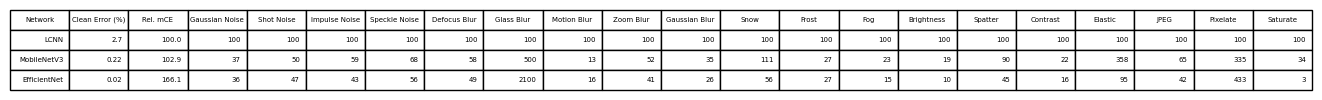

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Criar uma figura e um eixo
fig, ax = plt.subplots(figsize=(8, 0.2))  # Ajuste o tamanho conforme necessário

# Remover os eixos
ax.axis('off')

# Criar a tabela
table = ax.table(cellText=df_relative_mce.values, colLabels=df_relative_mce.columns, loc='center')

# Ajustar o layout
table.auto_set_font_size(False)
table.set_fontsize(5)
table.scale(2.1, 1.2)  # Ajuste a escala conforme necessário

# Salvar a imagem
plt.savefig('results/mce/tabela_relative_mce.png', bbox_inches='tight', dpi=300)

# Mostrar a imagem (opcional)
plt.show()

In [80]:
# ...existing code...

# NEW CELL START
import pandas as pd

# --- Prepare Data for Transposed Excel Table ---

# Make a copy to avoid modifying the original DataFrame used elsewhere
df_relative_mce_copy = df_relative_mce.copy()

# Set 'Network' as the index
df_transposed_for_excel = df_relative_mce_copy.set_index('Network')

# Transpose the DataFrame
df_transposed_for_excel = df_transposed_for_excel.T

# --- Save to Excel ---
excel_filename = 'results/mce/tabela_relative_mce_transposed.xlsx'
# Save with the index (corruption names/metrics) as the first column
df_transposed_for_excel.to_excel(excel_filename, index=True)

print(f"Transposed table saved to {excel_filename}")

# NEW CELL END

# ... rest of the notebook ...

Transposed table saved to results/mce/tabela_relative_mce_transposed.xlsx


In [82]:
import matplotlib.pyplot as plt

# Dados de exemplo (substitua pelos seus)
accuracy = df_mce['Clean Error (%)'].to_numpy()
accuracy = 100 - accuracy
mce = df_mce['mCE'].to_numpy()
relative_mce = df_relative_mce['Rel. mCE'].to_numpy()
labels = df_mce['Network'].to_numpy()

/tmp/ipykernel_4480/1005053535.py:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(accuracy_percent, relative_mce_values, 'o-', color='#ff7f0e', linestyle='dashed', label='Relative mCE')
/tmp/ipykernel_4480/1005053535.py:47: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(accuracy_percent, mce_values, 'o-', color='#1f77b4', linestyle='dashed', label='mCE')


Graph saved as results/mce/architecture_corruption_robustness_styled.png


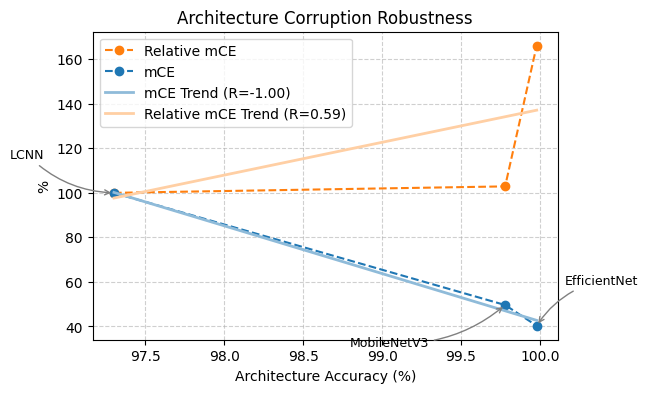

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd # Make sure pandas is imported if df_mce, df_relative_mce are DataFrames

# Ensure df_mce and df_relative_mce are loaded before this script.
# For example:
# df_mce = pd.read_json('results/mce/corruption_efficientNet_error.json') # Or however you load it
# df_relative_mce = pd.read_json(...) # Load your relative mCE data
# And ensure they are structured correctly:
# df_mce should have columns like 'Network', 'Error', 'mCE'
# df_relative_mce should have 'Network', 'Rel. mCE'

# Extract data (assuming df_mce and df_relative_mce are pandas DataFrames)
# If they are not, ensure 'accuracy', 'mce', 'relative_mce', 'labels' are numpy arrays as in your script
if isinstance(df_mce, pd.DataFrame) and isinstance(df_relative_mce, pd.DataFrame):
    # Filter for the models you want to plot if necessary, or ensure df_mce contains only them
    # For this example, we assume df_mce and df_relative_mce are already prepared for the target models
    
    # Sort by accuracy or a consistent order if needed for clearer plotting / annotation
    # df_mce = df_mce.sort_values(by='Error') # Example: Sort by error ascending (accuracy descending)
    # df_relative_mce = df_relative_mce.set_index('Network').reindex(df_mce['Network']).reset_index()

    accuracy_percent = 100 - df_mce['Clean Error (%)'].to_numpy() # Error is likely a percentage, so accuracy is 100 - Error
    mce_values = df_mce['mCE'].to_numpy()
    # Align relative_mce data with mce data by Network name
    # Create a mapping from Network to Rel. mCE for easier lookup
    rel_mce_map = df_relative_mce.set_index('Network')['Rel. mCE'].to_dict()
    relative_mce_values = np.array([rel_mce_map.get(net, np.nan) for net in df_mce['Network']])
    model_labels = df_mce['Network'].to_numpy()
else:
    # Fallback to assuming these are already numpy arrays as in your original script
    # This part is directly from your script
    accuracy_percent = df_mce['Clean Error (%)'].to_numpy() # Original was just 'Error'
    accuracy_percent = 100 - accuracy_percent      # Then 100 - error
    mce_values = df_mce['mCE'].to_numpy()
    relative_mce_values = df_relative_mce['Rel. mCE'].to_numpy()
    model_labels = df_mce['Network'].to_numpy()


# Creating the graph
fig, ax = plt.subplots(figsize=(6, 4)) # Original figsize

# Plotting the data
# Using colors and styles from your script, which match the example's theme
ax.plot(accuracy_percent, relative_mce_values, 'o-', color='#ff7f0e', linestyle='dashed', label='Relative mCE')
ax.plot(accuracy_percent, mce_values, 'o-', color='#1f77b4', linestyle='dashed', label='mCE')

# Add linear regression for mCE (blue points)
# Filter out NaNs for robust linear regression
valid_mce_indices = ~np.isnan(accuracy_percent) & ~np.isnan(mce_values)
if np.sum(valid_mce_indices) >= 2: # Need at least 2 points for a line
    slope_blue, intercept_blue, r_blue, p_blue, std_err_blue = stats.linregress(accuracy_percent[valid_mce_indices], mce_values[valid_mce_indices])
    x_line_blue = np.linspace(min(accuracy_percent[valid_mce_indices]), max(accuracy_percent[valid_mce_indices]), 100)
    y_line_blue = slope_blue * x_line_blue + intercept_blue
    ax.plot(x_line_blue, y_line_blue, '-', color='#8fbbd9', linewidth=2, label=f'mCE Trend (R={r_blue:.2f})')
else:
    print("Not enough data points to plot mCE trend line.")

# Add linear regression for Relative mCE (orange points)
valid_rel_mce_indices = ~np.isnan(accuracy_percent) & ~np.isnan(relative_mce_values)
if np.sum(valid_rel_mce_indices) >= 2: # Need at least 2 points for a line
    slope_orange, intercept_orange, r_orange, p_orange, std_err_orange = stats.linregress(accuracy_percent[valid_rel_mce_indices], relative_mce_values[valid_rel_mce_indices])
    x_line_orange = np.linspace(min(accuracy_percent[valid_rel_mce_indices]), max(accuracy_percent[valid_rel_mce_indices]), 100)
    y_line_orange = slope_orange * x_line_orange + intercept_orange
    ax.plot(x_line_orange, y_line_orange, '-', color='#ffcfa4', linewidth=2, label=f'Relative mCE Trend (R={r_orange:.2f})')
else:
    print("Not enough data points to plot Relative mCE trend line.")

# Define specific annotation styles for each model to match the example's aesthetic
# (model_name: {'xytext': (offset_x, offset_y_in_points), 'ha': horizontal_alignment})
# You'll likely need to adjust these offsets based on your actual data point locations.
annotation_configs = {
    'LCNN': {'xytext': (-50, 25), 'ha': 'right'},  # Text to the left and above the point
    'MobileNetV3': {'xytext': (-55, -30), 'ha': 'right'}, # Text to the left and below
    'EfficientNet': {'xytext': (20, 30), 'ha': 'left'},   # Text to the right and above
    'EfficientNetB0': {'xytext': (20, 30), 'ha': 'left'} # Alias for EfficientNetB0
    # Add your third model here if it's named differently
}

# Add annotations with arrows for your models, pointing to the mCE values
for i in range(len(model_labels)):
    model_name = model_labels[i]
    acc_val = accuracy_percent[i]
    mce_val = mce_values[i] # Annotating on the mCE line like in the example

    # Skip if data is NaN
    if np.isnan(acc_val) or np.isnan(mce_val):
        print(f"Skipping annotation for {model_name} due to NaN values.")
        continue

    # Get specific config or use a default
    config = annotation_configs.get(model_name)
    if not config: # Fallback for models not in explicit config
        # Default annotation to prevent errors, place it to the right of the point
        config = {'xytext': (10, 10), 'ha': 'left'} 
        print(f"Warning: No specific annotation config for {model_name}, using default.")


    ax.annotate(model_name,
                (acc_val, mce_val),
                textcoords="offset points", # Offset is in points from the xy value
                xytext=config['xytext'],
                ha=config['ha'],
                fontsize=9,
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3,rad=0.2", # Slight curve for the arrow
                                color='gray'))

# Formatting the graph
ax.set_xlabel("Architecture Accuracy (%)")
ax.set_ylabel("%") # Y-axis label from your original script
ax.set_title("Architecture Corruption Robustness")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6) # Dashed grid like the example

# Adjust plot limits if necessary, Matplotlib usually does a good job automatically
# ax.set_xlim(min(accuracy_percent)-5, max(accuracy_percent)+5) 
# ax.set_ylim(0, max(np.nanmax(mce_values), np.nanmax(relative_mce_values)) * 1.1)


# Salvando o gráfico
output_path = 'results/mce/architecture_corruption_robustness_styled.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Graph saved as {output_path}")

# Mostrando o gráfico
plt.show()

In [85]:
def calculate_mce_with_different_baselines():
    """
    Calcula mCE usando diferentes modelos como baseline (denominador)
    Retorna uma matriz com os resultados
    """
    
    # Dicionário com os dados de corrupção de cada modelo
    corruption_data = {
        'LCNN': corruption_error_lcnn,
        'MobileNetV3': corruption_error_mobilenetv3,
        'EfficientNet': corruption_error_efficientnet
    }
    
    # Dicionário com os erros limpos de cada modelo
    clean_errors = {
        'LCNN': CLEAN_ERROR_LCNN,
        'MobileNetV3': CLEAN_ERROR_MOBILENETV3,
        'EfficientNet': CLEAN_ERROR_EFFICIENTNET
    }
    
    # Lista de modelos
    models = ['LCNN', 'MobileNetV3', 'EfficientNet']
    
    # Dicionário para armazenar os resultados
    results_matrix = {}
    
    # Para cada modelo como baseline (denominador)
    for baseline_model in models:
        results_matrix[baseline_model] = {}
        
        # Calcular soma dos erros de corrupção para o modelo baseline
        sum_corruption_error_baseline = sum_corruption_error_by_corruption(corruption_data[baseline_model])
        sum_relative_corruption_error_baseline = sum_relative_corruption_error(
            corruption_data[baseline_model], 
            clean_errors[baseline_model]
        )
        
        # Para cada modelo sendo avaliado (numerador)
        for eval_model in models:
            print(f"Calculando mCE para {eval_model} com baseline {baseline_model}")
            
            # Calcular soma dos erros de corrupção para o modelo sendo avaliado
            sum_corruption_error_eval = sum_corruption_error_by_corruption(corruption_data[eval_model])
            sum_relative_corruption_error_eval = sum_relative_corruption_error(
                corruption_data[eval_model], 
                clean_errors[eval_model]
            )
            
            # Calcular mCE e Relative mCE
            ce_result, relative_ce_result = generate_relative_and_corruption_error(
                sum_corruption_error_eval,
                sum_relative_corruption_error_eval,
                sum_corruption_error_baseline,  # Usando o baseline como denominador
                sum_relative_corruption_error_baseline,  # Usando o baseline como denominador
                eval_model,
                clean_errors[eval_model]
            )
            
            # Armazenar os resultados
            results_matrix[baseline_model][eval_model] = {
                'mCE': ce_result['mCE'],
                'Rel_mCE': relative_ce_result['Rel. mCE'],
                'Error': ce_result['Error'],
                'full_ce_result': ce_result,
                'full_relative_ce_result': relative_ce_result
            }
    
    return results_matrix

corruption_error_lcnn = load_json('results/mce/corruption_lcnn_error.json')
corruption_error_mobilenetv3 = load_json('results/mce/corruption_mobilenetv3_error.json')
corruption_error_efficientnet = load_json('results/mce/corruption_efficientNet_error.json')
# Calcular a matriz de resultados
mce_matrix_results = calculate_mce_with_different_baselines()

Calculando mCE para LCNN com baseline LCNN
Calculando mCE para MobileNetV3 com baseline LCNN
Calculando mCE para EfficientNet com baseline LCNN
Calculando mCE para LCNN com baseline MobileNetV3
Calculando mCE para MobileNetV3 com baseline MobileNetV3
Calculando mCE para EfficientNet com baseline MobileNetV3
Calculando mCE para LCNN com baseline EfficientNet
Calculando mCE para MobileNetV3 com baseline EfficientNet
Calculando mCE para EfficientNet com baseline EfficientNet


In [86]:


def create_mce_summary_tables(matrix_results):
    """
    Cria tabelas resumidas dos resultados de mCE e Relative mCE
    """
    models = ['LCNN', 'MobileNetV3', 'EfficientNet']
    
    # Criar DataFrame para mCE
    mce_data = []
    rel_mce_data = []
    
    for baseline in models:
        mce_row = {'Baseline': baseline}
        rel_mce_row = {'Baseline': baseline}
        
        for eval_model in models:
            mce_row[eval_model] = matrix_results[baseline][eval_model]['mCE']
            rel_mce_row[eval_model] = matrix_results[baseline][eval_model]['Rel_mCE']
        
        mce_data.append(mce_row)
        rel_mce_data.append(rel_mce_row)
    
    df_mce_matrix = pd.DataFrame(mce_data)
    df_rel_mce_matrix = pd.DataFrame(rel_mce_data)
    
    return df_mce_matrix, df_rel_mce_matrix

# Criar as tabelas resumidas
df_mce_matrix, df_rel_mce_matrix = create_mce_summary_tables(mce_matrix_results)

print("Matriz mCE (linhas = baseline, colunas = modelo avaliado):")
print(df_mce_matrix)
print("\nMatriz Relative mCE:")
print(df_rel_mce_matrix)

Matriz mCE (linhas = baseline, colunas = modelo avaliado):
       Baseline   LCNN  MobileNetV3  EfficientNet
0          LCNN  100.0         49.6          40.3
1   MobileNetV3  413.2        100.0          63.5
2  EfficientNet  918.4        227.8         100.0

Matriz Relative mCE:
       Baseline   LCNN  MobileNetV3  EfficientNet
0          LCNN  100.0        102.9         166.1
1   MobileNetV3  247.2        100.0          91.6
2  EfficientNet  491.3        197.4         100.0


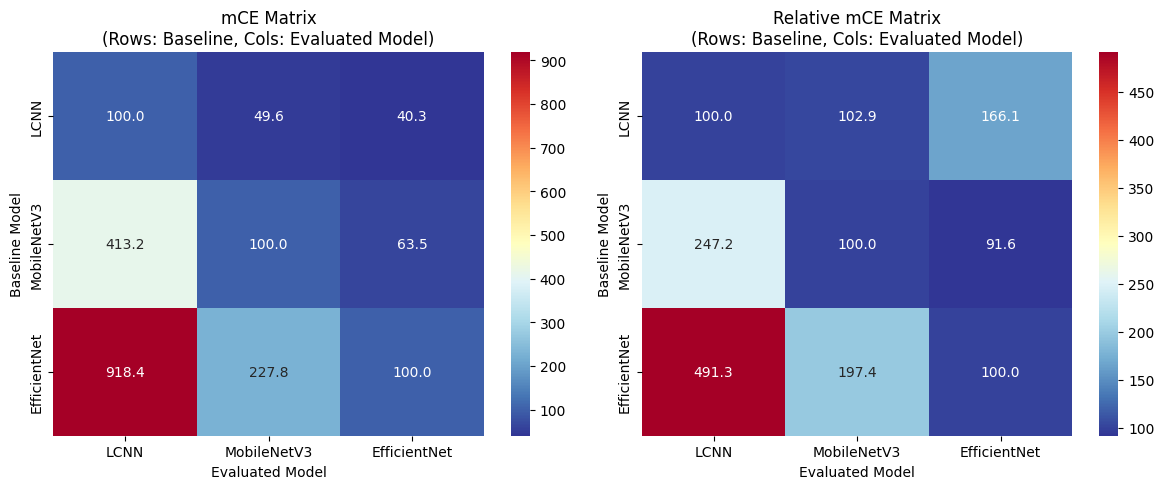

In [89]:
# Visualizar a matriz como heatmap
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap para mCE
mce_matrix_values = df_mce_matrix.set_index('Baseline')
sns.heatmap(mce_matrix_values, annot=True, fmt='.1f', cmap='RdYlBu_r', ax=ax1)
ax1.set_title('mCE Matrix\n(Rows: Baseline, Cols: Evaluated Model)')
ax1.set_xlabel('Evaluated Model')
ax1.set_ylabel('Baseline Model')

# Heatmap para Relative mCE
rel_mce_matrix_values = df_rel_mce_matrix.set_index('Baseline')
sns.heatmap(rel_mce_matrix_values, annot=True, fmt='.1f', cmap='RdYlBu_r', ax=ax2)
ax2.set_title('Relative mCE Matrix\n(Rows: Baseline, Cols: Evaluated Model)')
ax2.set_xlabel('Evaluated Model')
ax2.set_ylabel('Baseline Model')

plt.tight_layout()
plt.savefig('results/mce/mce_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()